In [1]:
import paramak
import numpy as np

# === COLOR MAP by COMPONENT NAME KEYWORDS ===
color_map = {
    "plasma": [0.94, 0.012, 1],
    "first_wall": [0.8, 0.2, 0.2],
    "blanket": [0.3, 0.7, 0.3],
    "back_wall": [0.7, 0.7, 0.3],
    "He_manifolds": [0.85, 0.85, 0.1],
    "structural_ring": [0.2, 0.4, 0.7],
    "vv": [0.4, 0.4, 0.4],
    "shield": [0.6, 0.6, 0.95],
    "inner_coil_case": [0.5, 0.5, 0.8],
    "winding_pack": [0.1, 0.22, 0.33],
    "outer_coil_case": [0.2, 0.45, 0.67],
    "thermal_shield": [0.1, 0.26, 0.82],
    "central_solenoid": [0.85, 0.85, 0.1],
}

# === FUNCTION TO GET COLOR BASED ON NAME ===
def get_color(name):
    for key in color_map:
        if key in name:
            return color_map[key]
    return [0.9, 0.9, 0.9]  # default light gray

# === GEOMETRY PARAMETERS ===
inboard_angle_offset = 10
outboard_angle_offset = 5
plasma_offset = 10
first_wall_thickness = 4
inboard_blanket_thickness = 44
outboard_blanket_thickness = 96
back_wall_thickness = 2
He_manifolds_thickness = 6
structural_ring_thickness = 20
inboard_structural_ring_offset = 1
outboard_structural_ring_offset = 150
vv_thickness = 10
vv_offset = 2
inboard_shield_thickness = 23
outboard_shield_thickness = 17
rotation_angle = 180
num_points = 200

# === PLASMA ===
plasma = paramak.Plasma(
    major_radius=480,
    minor_radius=120,
    triangularity=0.625,
    elongation=2.2,
    rotation_angle=rotation_angle,
    name='plasma',
    color=get_color('plasma')
)

# === INBOARD COMPONENTS ===
offset = plasma_offset
inboard_angles = (90 + inboard_angle_offset, 270 - inboard_angle_offset)

inboard_first_wall = paramak.BlanketFP(
    first_wall_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_first_wall',
    num_points=num_points, color=get_color('inboard_first_wall')
)
offset += first_wall_thickness

inboard_blanket = paramak.BlanketFP(
    inboard_blanket_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_blanket',
    num_points=num_points, color=get_color('inboard_blanket')
)
offset += inboard_blanket_thickness

back_wall = paramak.BlanketFP(
    back_wall_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='back_wall',
    num_points=num_points, color=get_color('back_wall')
)
offset += back_wall_thickness

inboard_He_manifolds = paramak.BlanketFP(
    He_manifolds_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_He_manifolds',
    num_points=num_points, color=get_color('inboard_He_manifolds')
)
offset += He_manifolds_thickness

inboard_structural_ring = paramak.BlanketFP(
    structural_ring_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_structural_ring',
    num_points=num_points, color=get_color('inboard_structural_ring')
)
offset += structural_ring_thickness + inboard_structural_ring_offset

inboard_vv = paramak.BlanketFP(
    vv_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_vv',
    num_points=num_points, color=get_color('inboard_vv')
)
offset += vv_thickness + vv_offset

inboard_shield = paramak.BlanketFP(
    inboard_shield_thickness, *inboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='inboard_shield',
    num_points=num_points, color=get_color('inboard_shield')
)

# === OUTBOARD COMPONENTS ===
offset = plasma_offset
outboard_angles = (-90 + outboard_angle_offset, 90 - outboard_angle_offset)

outboard_first_wall = paramak.BlanketFP(
    first_wall_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_first_wall',
    num_points=num_points, color=get_color('outboard_first_wall')
)
offset += first_wall_thickness

outboard_blanket = paramak.BlanketFP(
    outboard_blanket_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_blanket',
    num_points=num_points, color=get_color('outboard_blanket')
)
offset += outboard_blanket_thickness

outboard_He_manifolds = paramak.BlanketFP(
    He_manifolds_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_He_manifolds',
    num_points=num_points, color=get_color('outboard_He_manifolds')
)
offset += He_manifolds_thickness

outboard_structural_ring = paramak.BlanketFP(
    structural_ring_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_structural_ring',
    num_points=num_points, color=get_color('outboard_structural_ring')
)
offset += structural_ring_thickness + outboard_structural_ring_offset

outboard_vv = paramak.BlanketFP(
    vv_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_vv',
    num_points=num_points, color=get_color('outboard_vv')
)
offset += vv_thickness + vv_offset

outboard_shield = paramak.BlanketFP(
    outboard_shield_thickness, *outboard_angles,
    plasma=plasma, offset_from_plasma=offset,
    rotation_angle=rotation_angle, name='outboard_shield',
    num_points=num_points, color=get_color('outboard_shield')
)

# === CENTER COLUMN COMPONENTS ===
central_solenoid = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=0,
    outer_radius=104.7,
    name='central_solenoid',
    color=get_color('central_solenoid')
)

coil_case_inner = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=104.7,
    outer_radius=151.7,
    name='inner_coil_case',
    color=get_color('inner_coil_case')
)

winding_pack = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=151.7,
    outer_radius=214.7,
    name='winding_pack',
    color=get_color('winding_pack')
)

coil_case_outer = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=215.0,
    outer_radius=222.0,
    name='outer_coil_case',
    color=get_color('outer_coil_case')
)

thermal_shield = paramak.CenterColumnShieldCylinder(
    height=1000,
    inner_radius=222.0,
    outer_radius=224.0,
    name='thermal_shield',
    color=get_color('thermal_shield')
)

# === REACTOR ASSEMBLY ===
fnsf_reactor = paramak.Reactor(
    shapes_and_components=[
        plasma,
        inboard_first_wall, inboard_blanket, back_wall,
        inboard_He_manifolds, inboard_structural_ring, inboard_vv, inboard_shield,
        outboard_first_wall, outboard_blanket, outboard_He_manifolds,
        outboard_structural_ring, outboard_vv, outboard_shield,
        central_solenoid, coil_case_inner, coil_case_outer, winding_pack, thermal_shield,
    ]
)

# === DISPLAY MODEL ===
#fnsf_reactor.export_html_3d('my_reactor_3d.html')

In [2]:
fnsf_reactor.export_dagmc_h5m(
         filename='fnsf_reactor.h5m',
         min_mesh_size=5,
         max_mesh_size=20
     )


assembly found
checking new shape against 19 parts
    checking shape against brep part 1
    checking shape against brep part 2
    checking shape against brep part 3
    checking shape against brep part 4
    checking shape against brep part 5
    checking shape against brep part 6
    checking shape against brep part 7
    checking shape against brep part 8
    checking shape against brep part 9
    checking shape against brep part 10
    single matching pair, brep id = 1 shape id = 1
checking new shape against 18 parts
    checking shape against brep part 1
    checking shape against brep part 2
    checking shape against brep part 3
    checking shape against brep part 4
    checking shape against brep part 5
    checking shape against brep part 6
    checking shape against brep part 7
    checking shape against brep part 8
    checking shape against brep part 9
    checking shape against brep part 10
    single matching pair, brep id = 2 shape id = 2
checking new shape against 17

'fnsf_reactor.h5m'

In [1]:
import openmc
openmc.config['cross_sections']='/home/rifat/endfb-viii.0-hdf5/cross_sections.xml'
from openmc_plasma_source import TokamakSource
from openmc_plasma_source import plotting as ops_plt
import matplotlib.pyplot as plt
import math

def make_materials_geometry_tallies(enrichment,material_id_start=1):
 materials = openmc.Materials()
 mat_id = material_id_start
 plasma = openmc.Material(material_id_start,"plasma")
 plasma.add_nuclide('H2', 1.0)
 plasma.add_nuclide('H3', 1.0)
 plasma.set_density('g/cm3', 1e-5)
 materials.append(plasma)
 mat_id += 1
 # === FIRST WALLS AND W ARMOR ===
 def make_first_wall(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 8.7 * 0.05 + 100 * 0.66 * 0.95, 'wo')
    mat.add_element('Fe', 89.66 * 0.34 * 0.95, 'wo')
    mat.add_element('Cr', 8.0 * 0.34 * 0.95, 'wo')
    mat.add_element('W', 91.3 * 0.05 + 2.0 * 0.34 * 0.95, 'wo')
    mat.add_element('C', 0.1 * 0.34 * 0.95, 'wo')
    mat.add_element('V', 0.2 * 0.34 * 0.95, 'wo')
    mat.add_element('Ta', 0.04 * 0.34 * 0.95, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.55)
    mat_id += 1
    return mat

 materials.append(make_first_wall("inboard_first_wall"))
 materials.append(make_first_wall("outboard_first_wall"))

 # === BLANKETS ===
 def make_blanket(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Li', 73.7, enrichment_target='Li6', enrichment=enrichment, percent_type='wo')
    mat.add_element('C', 1.17, 'wo')
    mat.add_element('Si', 2.73, 'wo')
    mat.add_element('Cr', 0.7875, 'wo')
    mat.add_element('Fe', 6.6975, 'wo')
    mat.add_element('He', 14.9, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 6.52)
    mat_id += 1
    return mat

 materials.append(make_blanket("inboard_blanket"))
 materials.append(make_blanket("outboard_blanket"))

 # === BACK WALL ===
 def make_back_wall(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id,name)
    mat.add_element('He', 20.0, 'wo')
    mat.add_element('Fe', 89.66 * 0.80, 'wo')
    mat.add_element('Cr', 8.0 * 0.80, 'wo')
    mat.add_element('W', 2.0 * 0.80, 'wo')
    mat.add_element('C', 0.1 * 0.80, 'wo')
    mat.add_element('V', 0.2 * 0.80, 'wo')
    mat.add_element('Ta', 0.04 * 0.80, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.55)
    mat_id += 1
    return mat

 materials.append(make_back_wall("back_wall"))

 # === HELIUM MANIFOLDS ===
 def make_He_manifold(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 70.0, 'wo')
    mat.add_element('Fe', 26.7, 'wo')
    mat.add_element('Cr', 2.55, 'wo')
    mat.add_element('W', 0.6, 'wo')
    mat.add_element('V', 0.06, 'wo')
    mat.add_element('Ta', 0.015, 'wo')
    mat.add_element('C', 0.03, 'wo')
    mat.add_element('Mn', 0.15, 'wo')
    mat.add_element('Si', 0.06, 'wo')
    mat.add_element('N', 0.006, 'wo')
    mat.add_element('Ni', 0.03, 'wo')
    mat.add_element('Cu', 0.015, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 2.544)
    mat_id += 1
    return mat

 materials.append(make_He_manifold("inboard_He_manifolds"))
 materials.append(make_He_manifold("outboard_He_manifolds"))

 # === STRUCTURAL RINGS ===
 def make_structural_ring(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 20.0, 'wo')
    mat.add_element('Fe', 89.66 * 0.28, 'wo')
    mat.add_element('Cr', 8.0 * 0.28, 'wo')
    mat.add_element('W', 2.0 * 0.28, 'wo')
    mat.add_element('C', 0.1 * 0.28, 'wo')
    mat.add_element('V', 0.2 * 0.28, 'wo')
    mat.add_element('Ta', 0.04 * 0.28, 'wo')
    mat.add_element('Fe', 90.0 * 0.52, 'wo')
    mat.add_element('Cr', 9.0 * 0.52, 'wo')
    mat.add_element('B', 0.005 * 0.52, 'wo')
    mat.add_element('C', 0.1 * 0.52, 'wo')
    mat.add_element('Mn', 0.3 * 0.52, 'wo')
    mat.add_element('Si', 0.2 * 0.52, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 6.28)
    mat_id += 1
    return mat

 materials.append(make_structural_ring("inboard_structural_ring"))
 materials.append(make_structural_ring("outboard_structural_ring"))

 # === VACUUM VESSEL ===
 def make_vacuum_vessel(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('He', 40.0, 'wo')
    mat.add_element('Fe', 55.98, 'wo')
    mat.add_element('Cr', 1.8, 'wo')
    mat.add_element('W', 1.2, 'wo')
    mat.add_element('V', 0.12, 'wo')
    mat.add_element('Ta', 0.03, 'wo')
    mat.add_element('C', 0.06, 'wo')
    mat.add_element('Mn', 0.18, 'wo')
    mat.add_element('Si', 0.12, 'wo')
    mat.add_element('N', 0.012, 'wo')
    mat.add_element('Ni', 0.03, 'wo')
    mat.add_element('Cu', 0.048, 'wo')
    mat.add_s_alpha_beta('c_Graphite')
    mat.set_density('g/cm3', 4.5)
    mat_id += 1
    return mat

 materials.append(make_vacuum_vessel("inboard_vv"))
 materials.append(make_vacuum_vessel( "outboard_vv"))

 # === SHIELD ===
 def make_shield(name):  
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Fe', 89.66 * 0.39, 'wo')
    mat.add_element('Cr', 8.0 * 0.39, 'wo')
    mat.add_element('W', 2.0 * 0.39, 'wo')
    mat.add_element('C', 0.1 * 0.39, 'wo')
    mat.add_element('V', 0.2 * 0.39, 'wo')
    mat.add_element('Ta', 0.04 * 0.39, 'wo')
    mat.add_element('Fe', 90.0 * 0.29, 'wo')
    mat.add_element('Cr', 9.0 * 0.29, 'wo')
    mat.add_element('B', 0.005 * 0.29, 'wo')
    mat.add_element('C', 0.1 * 0.29, 'wo')
    mat.add_element('Mn', 0.3 * 0.29, 'wo')
    mat.add_element('Si', 0.2 * 0.29, 'wo')
    mat.add_element('H', 2.0 * 0.32, 'wo')
    mat.add_element('O', 16.0 * 0.32, 'wo')
    mat.add_s_alpha_beta('c_H_in_H2O')
    mat.set_density('g/cm3', 5.658)
    mat_id += 1
    return mat

 materials.append(make_shield("inboard_shield"))
 materials.append(make_shield("outboard_shield"))
 
 # === COIL CASE & CENTRAL SOLENOID ===
 def center_solenoid(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Nb', 3.0)
    mat.add_element('Sn', 1.0)
    mat.set_density('g/cm3', 8.74)
    mat_id += 1
    return mat
 materials.append(center_solenoid('central_solenoid'))
  
 def make_coil_case(name):
    nonlocal mat_id
    mat = openmc.Material(mat_id, name)
    mat.add_element('Fe', 64.995, 'wo')
    mat.add_element('Cr', 17.5, 'wo')
    mat.add_element('Ni', 12.0, 'wo')
    mat.add_element('Mo', 2.5, 'wo')
    mat.add_element('Mn', 2.0, 'wo')
    mat.add_element('Si', 0.75, 'wo')
    mat.add_element('C', 0.08, 'wo')
    mat.add_element('N', 0.10, 'wo')
    mat.add_element('P', 0.045, 'wo')
    mat.add_element('S', 0.03, 'wo')
    mat.set_density('g/cm3', 7.98)
    mat_id += 1
    return mat

 materials.append(make_coil_case("inner_coil_case"))
 materials.append(make_coil_case("outer_coil_case"))

 def make_winding_pack(name):
    nonlocal mat_id
    winding_pack = openmc.Material(mat_id ,name)
    winding_pack.add_element('Fe', 89.5 * 0.30, 'wo')
    winding_pack.add_element('Cr', 9.0 * 0.30, 'wo')
    winding_pack.add_element('Mo', 1.0 * 0.30, 'wo')
    winding_pack.add_element('W', 0.5 * 0.30, 'wo')
    winding_pack.add_element('C', 0.05 * 0.30, 'wo')
    winding_pack.add_element('Cu', 25.0, 'wo')
    winding_pack.add_element('Nb', 70.1 * 0.25, 'wo')
    winding_pack.add_element('Sn', 29.9 * 0.25, 'wo')
    winding_pack.add_element('Si', 60.0 * 0.10, 'wo')
    winding_pack.add_element('O', 60.0 * 0.10, 'wo')
    winding_pack.add_element('C', 40.0 * 0.10, 'wo')
    winding_pack.add_element('He', 10.0, 'wo')
    winding_pack.set_density('g/cm3', 5.82)
    mat_id+=1
    return winding_pack
 materials.append(make_winding_pack("winding_pack"))

 def mat_thermal_shield(name):
    nonlocal mat_id
    thermal_shield = openmc.Material(mat_id,name)
    thermal_shield.add_element('Be', 100.0 * 0.30, 'wo')
    thermal_shield.add_element('Fe', 87.0 * 0.30, 'wo')
    thermal_shield.add_element('Cr', 8.0 * 0.30, 'wo')
    thermal_shield.add_element('W', 2.0 * 0.30 + 100.0 * 0.10, 'wo')
    thermal_shield.add_element('V', 2.0 * 0.30, 'wo')
    thermal_shield.add_element('C', 1.0 * 0.30 + 100.0 * 0.20 + 30.0 * 0.10, 'wo')
    thermal_shield.add_element('Mn', 0.8 * 0.30, 'wo')
    thermal_shield.add_element('Si', 0.2 * 0.30 + 70.0 * 0.10, 'wo')
    thermal_shield.set_density('g/cm3', 5.3494)
    mat_id+=1
    return thermal_shield
 materials.append(mat_thermal_shield("thermal_shield"))

 # === EXPORT ===
 materials.export_to_xml()
 dag_univ = openmc.DAGMCUniverse(filename="/home/rifat/codes/fnsf_reactor.h5m")
 bbox = dag_univ.bounding_box
 dagmc_radius = max(abs(bbox[0][0]), abs(bbox[0][1]), abs(bbox[1][0]), abs(bbox[1][1]))

 cylinder_surface = openmc.ZCylinder(r=dagmc_radius, boundary_type="vacuum", surface_id=1000)
 lower_z = openmc.ZPlane(bbox[0][2], boundary_type="vacuum", surface_id=1003)
 upper_z = openmc.ZPlane(bbox[1][2], boundary_type="vacuum", surface_id=1004)

 # this is the surface along the side of the 180 degree model
 side_surface = openmc.YPlane(y0=0, boundary_type="reflective", surface_id=1001)

 wedge_region = -cylinder_surface & +lower_z & -upper_z & +side_surface

 # bounding cell is a wedge shape filled with the DAGMC universe
 bounding_cell = openmc.Cell(fill=dag_univ, cell_id=1000, region=wedge_region)
 my_plasma = TokamakSource(
    elongation=2.2,
    ion_density_centre=1.6e20,
    ion_density_pedestal=1e20,
    ion_density_peaking_factor=1.52,
    ion_density_separatrix=0.56e20,
    ion_temperature_centre=22,
    ion_temperature_pedestal=4,
    ion_temperature_separatrix=0.1,
    ion_temperature_peaking_factor=2.25,
    ion_temperature_beta=7,
    major_radius=480,
    minor_radius=120,
    pedestal_radius=114,
    mode="H",
    shafranov_factor=0.144,
    triangularity=0.625,
    sample_size=50000,
 ) 
 plasma = my_plasma.make_openmc_sources()

 # bound_dag_univ = dag_univ.bounded_universe()
 geometry = openmc.Geometry([bounding_cell])
 geometry.export_to_xml()
 settings=openmc.Settings()
 settings.run_mode="fixed source"
 settings.batches=100
 settings.particles=50000
 settings.source=plasma
 tallies=openmc.Tallies()
 openmc.reset_auto_ids()

 #umesh = openmc.UnstructuredMesh(filename="fnsf_reactor.h5m", library="moab", mesh_id=1)
 mesh1=openmc.RegularMesh.from_domain(
    geometry,dimension=(200,200,200)
 )
 mesh_filter = openmc.MeshFilter(mesh1)
 radial_filter = openmc.ZernikeRadialFilter(order=250, x=0.0, y=0.0, r=915)



 tbr_tally = openmc.Tally(name="tbr",tally_id=4)
 tbr_tally.scores = ["(n,Xt)"]
 tbr_tally.nuclides=['Li6','Li7']
 tallies.append(tbr_tally)

 utbr_tally = openmc.Tally(name="utbr",tally_id=5)
 utbr_tally.scores = ["(n,Xt)"]
 utbr_tally.filters.append(radial_filter)
 tallies.append(utbr_tally)

 mtbr_tally = openmc.Tally(name="mtbr",tally_id=6)
 mtbr_tally.scores = ["(n,Xt)"]
 mtbr_tally.filters.append(mesh_filter)
 tallies.append(mtbr_tally)

 import numpy as np
 energies = np.logspace(np.log10(1e-5), np.log10(20.0e6), 1001)
 e_filter = openmc.EnergyFilter(energies)
 # builds the openmc model
 model = openmc.Model(
    materials=materials, geometry=geometry, settings=settings, tallies=tallies
 )
 
 sp_filename=model.run(threads=16)
 sp = openmc.StatePoint(sp_filename)

 tbr_tally = sp.get_tally(name='tbr')

 tdf = tbr_tally.get_pandas_dataframe()

 tbr_tally_result = tdf['mean'].sum()
 tbr_tally_std_dev = tdf['std. dev.'].sum()

 xtbr=sp.get_tally(name='utbr')
 xtdf=xtbr.get_pandas_dataframe()
 
 mtbr=sp.get_tally(name='mtbr')
 
 mtbr_mean = mtbr.mean.reshape(*mesh1.dimension)

 return {'enrichment': enrichment,
   'tbr_tally_result': tbr_tally_result,
  'tbr_tally_std_dev': tbr_tally_std_dev}


In [2]:


results = []
for enrichment in [0.1, 10,20,30,40,50,60,70,80,90,100]:
    results.append(make_materials_geometry_tallies(enrichment))



/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc_plasma_source/tokamak_source.py:265: RuntimeWarning: invalid value encountered in power
  * (1 - (r / self.pedestal_radius) ** 2)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc_plasma_source/tokamak_source.py:305: RuntimeWarning: invalid value encountered in power
  * (1 - (r / self.pedestal_radius) ** self.ion_temperature_beta)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/rifat/miniconda3/envs/env_neutronics/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Mater

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [9]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
 
  go.Scatter(
    x=[entry['enrichment'] for entry in results],
        y=[entry['tbr_tally_result'] for entry in results],
        mode='lines',
        error_y={'array': [entry['tbr_tally_std_dev'] for entry in results]},
        )

 )

fig.update_layout(
    title="TBR of pure Li with variable Li-6 percentages",
    xaxis_title="Li6 enrichment (%)",
    yaxis_title="TBR"
)

fig.show()



In [4]:
import pandas as pd
df=pd.DataFrame(results)

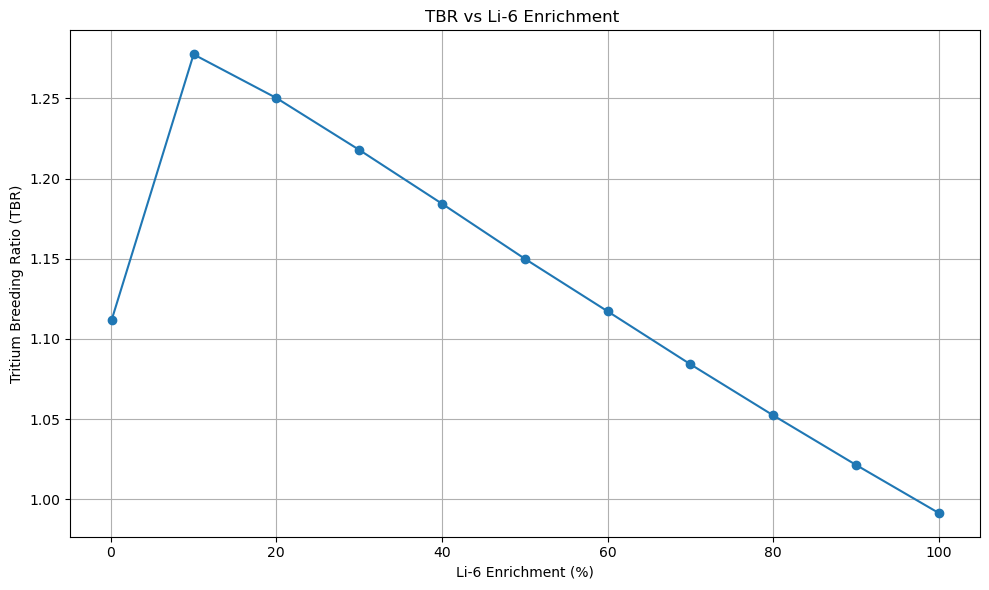

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame as `df`
# Li percentages in order per enrichment value (5 per enrichment)


# Add a 'li_percentage' column by repeating the list for each enrichment level


# Group and plot
plt.figure(figsize=(10, 6))

plt.errorbar(
    df['enrichment'], 
    df['tbr_tally_result'], 
    yerr=df['tbr_tally_std_dev'],
   
        marker='o', 
        capsize=3
    )

# Plot styling
plt.xlabel("Li-6 Enrichment (%)")
plt.ylabel("Tritium Breeding Ratio (TBR)")
plt.title("TBR vs Li-6 Enrichment ")
plt.pixels=[2000,2000]
plt.grid(True)
plt.tight_layout()
plt.show()